### Import Necessary Module and Set Path 

In [50]:
import sqlite3 as lite
import os
import sys
import matplotlib.pyplot as plt
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [24]:
import analysis as an
import random_lifetime_extension as rle
import cyclus_input_gen.from_pris as fp
import cyclus_input_gen.demand_deploy as dd
import cyclus_input_gen.find_replace as fr

## Create Cyclus Input file with varying breeding ratios

In [27]:
# input generation - increased breeding ratio (using the input.xml generated from the analysis notebook)
with open('input_astrid.xml') as f:
    input_string = f.read()

o_11 ="""

  <recipe>
    <name>sfr_spent_mox_recipe</name>
    <basis>mass</basis>
     <nuclide> <id>He4</id>  <comp>1.26E-04</comp> </nuclide> 
   <nuclide> <id>Ra226</id>  <comp>3.53E-13</comp> </nuclide> 
   <nuclide> <id>Ra228</id>  <comp>8.84E-21</comp> </nuclide> 
   <nuclide> <id>Pb206</id>  <comp>1.65E-17</comp> </nuclide> 
   <nuclide> <id>Pb207</id>  <comp>2.43E-15</comp> </nuclide> 
   <nuclide> <id>Pb208</id>  <comp>1.20E-09</comp> </nuclide> 
   <nuclide> <id>Pb210</id>  <comp>3.00E-16</comp> </nuclide> 
   <nuclide> <id>Th228</id>  <comp>5.86E-10</comp> </nuclide> 
   <nuclide> <id>Th229</id>  <comp>7.02E-11</comp> </nuclide> 
   <nuclide> <id>Th230</id>  <comp>1.24E-08</comp> </nuclide> 
   <nuclide> <id>Th232</id>  <comp>7.01E-11</comp> </nuclide> 
   <nuclide> <id>Bi209</id>  <comp>5.13E-13</comp> </nuclide> 
   <nuclide> <id>Ac227</id>  <comp>4.64E-14</comp> </nuclide> 
   <nuclide> <id>Pa231</id>  <comp>1.01E-09</comp> </nuclide> 
   <nuclide> <id>U232</id>  <comp>1.83E-07</comp> </nuclide> 
   <nuclide> <id>U233</id>  <comp>3.83E-08</comp> </nuclide> 
   <nuclide> <id>U234</id>  <comp>9.12E-04</comp> </nuclide> 
   <nuclide> <id>U235</id>  <comp>4.53E-04</comp> </nuclide> 
   <nuclide> <id>U236</id>  <comp>4.55E-04</comp> </nuclide> 
   <nuclide> <id>U238</id>  <comp>5.43E-01</comp> </nuclide> 
   <nuclide> <id>Np237</id>  <comp>4.78E-03</comp> </nuclide> 
   <nuclide> <id>Pu238</id>  <comp>1.13E-02</comp> </nuclide> 
   <nuclide> <id>Pu239</id>  <comp>1.03E-01</comp> </nuclide> 
   <nuclide> <id>Pu240</id>  <comp>8.83E-02</comp> </nuclide> 
   <nuclide> <id>Pu241</id>  <comp>1.73E-02</comp> </nuclide> 
   <nuclide> <id>Pu242</id>  <comp>2.63E-02</comp> </nuclide> 
   <nuclide> <id>Pu244</id>  <comp>1.79E-07</comp> </nuclide> 
   <nuclide> <id>Am241</id>  <comp>8.75E-03</comp> </nuclide> 
   <nuclide> <id>Am242m</id>  <comp>5.85E-04</comp> </nuclide> 
   <nuclide> <id>Am243</id>  <comp>8.10E-03</comp> </nuclide> 
   <nuclide> <id>Cm242</id>  <comp>4.96E-04</comp> </nuclide> 
   <nuclide> <id>Cm243</id>  <comp>5.49E-05</comp> </nuclide> 
   <nuclide> <id>Cm244</id>  <comp>5.87E-03</comp> </nuclide> 
   <nuclide> <id>Cm245</id>  <comp>1.58E-03</comp> </nuclide> 
   <nuclide> <id>Cm246</id>  <comp>8.20E-04</comp> </nuclide> 
   <nuclide> <id>Cm247</id>  <comp>5.67E-05</comp> </nuclide> 
   <nuclide> <id>Cm248</id>  <comp>5.26E-06</comp> </nuclide> 
   <nuclide> <id>Cm250</id>  <comp>1.19E-12</comp> </nuclide> 
   <nuclide> <id>Cf249</id>  <comp>2.31E-07</comp> </nuclide> 
   <nuclide> <id>Cf250</id>  <comp>1.56E-08</comp> </nuclide> 
   <nuclide> <id>Cf251</id>  <comp>5.82E-10</comp> </nuclide> 
   <nuclide> <id>Cf252</id>  <comp>1.58E-11</comp> </nuclide> 
   <nuclide> <id>H3</id>  <comp>3.84E-07</comp> </nuclide> 
   <nuclide> <id>Kr81</id>  <comp>2.18E-11</comp> </nuclide> 
   <nuclide> <id>Kr85</id>  <comp>6.08E-05</comp> </nuclide> 
   <nuclide> <id>Sr90</id>  <comp>1.15E-03</comp> </nuclide> 
   <nuclide> <id>Tc99</id>  <comp>3.79E-03</comp> </nuclide> 
   <nuclide> <id>I129</id>  <comp>1.19E-03</comp> </nuclide> 
   <nuclide> <id>Cs134</id>  <comp>1.48E-04</comp> </nuclide> 
   <nuclide> <id>Cs135</id>  <comp>6.65E-03</comp> </nuclide> 
   <nuclide> <id>Cs137</id>  <comp>5.82E-03</comp> </nuclide> 

  </recipe> 

"""

o_18 = """

  <recipe>
    <name>sfr_spent_mox_recipe</name>
    <basis>mass</basis>
     <nuclide> <id>He4</id>  <comp>1.44E-04</comp> </nuclide> 
     <nuclide> <id>Ra226</id>  <comp>6.38E-13</comp> </nuclide> 
     <nuclide> <id>Ra228</id>  <comp>1.51E-20</comp> </nuclide> 
     <nuclide> <id>Pb206</id>  <comp>3.10E-17</comp> </nuclide> 
     <nuclide> <id>Pb207</id>  <comp>4.56E-15</comp> </nuclide> 
     <nuclide> <id>Pb208</id>  <comp>1.04E-09</comp> </nuclide> 
     <nuclide> <id>Pb210</id>  <comp>5.55E-16</comp> </nuclide> 
     <nuclide> <id>Th228</id>  <comp>1.17E-09</comp> </nuclide> 
     <nuclide> <id>Th229</id>  <comp>6.04E-11</comp> </nuclide> 
     <nuclide> <id>Th230</id>  <comp>2.13E-08</comp> </nuclide> 
     <nuclide> <id>Th232</id>  <comp>1.15E-10</comp> </nuclide> 
     <nuclide> <id>Bi209</id>  <comp>4.50E-13</comp> </nuclide> 
     <nuclide> <id>Ac227</id>  <comp>8.59E-14</comp> </nuclide> 
     <nuclide> <id>Pa231</id>  <comp>1.83E-09</comp> </nuclide> 
     <nuclide> <id>U232</id>  <comp>1.39E-07</comp> </nuclide> 
     <nuclide> <id>U233</id>  <comp>5.42E-08</comp> </nuclide> 
     <nuclide> <id>U234</id>  <comp>1.40E-03</comp> </nuclide> 
     <nuclide> <id>U235</id>  <comp>4.44E-04</comp> </nuclide> 
     <nuclide> <id>U236</id>  <comp>6.75E-04</comp> </nuclide> 
     <nuclide> <id>U238</id>  <comp>5.21E-01</comp> </nuclide> 
     <nuclide> <id>Np237</id>  <comp>3.21E-03</comp> </nuclide> 
     <nuclide> <id>Pu238</id>  <comp>1.12E-02</comp> </nuclide> 
     <nuclide> <id>Pu239</id>  <comp>9.71E-02</comp> </nuclide> 
     <nuclide> <id>Pu240</id>  <comp>1.02E-01</comp> </nuclide> 
     <nuclide> <id>Pu241</id>  <comp>1.85E-02</comp> </nuclide> 
     <nuclide> <id>Pu242</id>  <comp>3.16E-02</comp> </nuclide> 
     <nuclide> <id>Pu244</id>  <comp>2.22E-07</comp> </nuclide> 
     <nuclide> <id>Am241</id>  <comp>8.85E-03</comp> </nuclide> 
     <nuclide> <id>Am242m</id>  <comp>6.40E-04</comp> </nuclide> 
     <nuclide> <id>Am243</id>  <comp>1.06E-02</comp> </nuclide> 
     <nuclide> <id>Cm242</id>  <comp>5.09E-04</comp> </nuclide> 
     <nuclide> <id>Cm243</id>  <comp>6.22E-05</comp> </nuclide> 
     <nuclide> <id>Cm244</id>  <comp>8.64E-03</comp> </nuclide> 
     <nuclide> <id>Cm245</id>  <comp>2.55E-03</comp> </nuclide> 
     <nuclide> <id>Cm246</id>  <comp>1.57E-03</comp> </nuclide> 
     <nuclide> <id>Cm247</id>  <comp>1.10E-04</comp> </nuclide> 
     <nuclide> <id>Cm248</id>  <comp>1.03E-05</comp> </nuclide> 
     <nuclide> <id>Cm250</id>  <comp>2.34E-12</comp> </nuclide> 
     <nuclide> <id>Cf249</id>  <comp>4.55E-07</comp> </nuclide> 
     <nuclide> <id>Cf250</id>  <comp>3.08E-08</comp> </nuclide> 
     <nuclide> <id>Cf251</id>  <comp>1.15E-09</comp> </nuclide> 
     <nuclide> <id>Cf252</id>  <comp>3.12E-11</comp> </nuclide> 
     <nuclide> <id>H3</id>  <comp>3.79E-07</comp> </nuclide> 
     <nuclide> <id>Kr81</id>  <comp>2.10E-11</comp> </nuclide> 
     <nuclide> <id>Kr85</id>  <comp>5.97E-05</comp> </nuclide> 
     <nuclide> <id>Sr90</id>  <comp>1.13E-03</comp> </nuclide> 
     <nuclide> <id>Tc99</id>  <comp>3.73E-03</comp> </nuclide> 
     <nuclide> <id>I129</id>  <comp>1.16E-03</comp> </nuclide> 
     <nuclide> <id>Cs134</id>  <comp>1.46E-04</comp> </nuclide> 
     <nuclide> <id>Cs135</id>  <comp>6.54E-03</comp> </nuclide> 
     <nuclide> <id>Cs137</id>  <comp>5.73E-03</comp> </nuclide> 
 </recipe>
"""

o_15 = """

  <recipe>
    <name>sfr_spent_mox_recipe</name>
    <basis>mass</basis>
     <nuclide> <id>He4</id>  <comp>1.35E-04</comp> </nuclide> 
     <nuclide> <id>Ra226</id>  <comp>4.96E-13</comp> </nuclide> 
     <nuclide> <id>Ra228</id>  <comp>1.20E-20</comp> </nuclide> 
     <nuclide> <id>Pb206</id>  <comp>2.37E-17</comp> </nuclide> 
     <nuclide> <id>Pb207</id>  <comp>3.50E-15</comp> </nuclide> 
     <nuclide> <id>Pb208</id>  <comp>1.12E-09</comp> </nuclide> 
     <nuclide> <id>Pb210</id>  <comp>4.28E-16</comp> </nuclide> 
     <nuclide> <id>Th228</id>  <comp>8.79E-10</comp> </nuclide> 
     <nuclide> <id>Th229</id>  <comp>6.53E-11</comp> </nuclide> 
     <nuclide> <id>Th230</id>  <comp>1.69E-08</comp> </nuclide> 
     <nuclide> <id>Th232</id>  <comp>9.25E-11</comp> </nuclide> 
     <nuclide> <id>Bi209</id>  <comp>4.82E-13</comp> </nuclide> 
     <nuclide> <id>Ac227</id>  <comp>6.61E-14</comp> </nuclide> 
     <nuclide> <id>Pa231</id>  <comp>1.42E-09</comp> </nuclide> 
     <nuclide> <id>U232</id>  <comp>1.61E-07</comp> </nuclide> 
     <nuclide> <id>U233</id>  <comp>4.63E-08</comp> </nuclide> 
     <nuclide> <id>U234</id>  <comp>1.15E-03</comp> </nuclide> 
     <nuclide> <id>U235</id>  <comp>4.48E-04</comp> </nuclide> 
     <nuclide> <id>U236</id>  <comp>5.65E-04</comp> </nuclide> 
     <nuclide> <id>U238</id>  <comp>5.32E-01</comp> </nuclide> 
     <nuclide> <id>Np237</id>  <comp>4.00E-03</comp> </nuclide> 
     <nuclide> <id>Pu238</id>  <comp>1.12E-02</comp> </nuclide> 
     <nuclide> <id>Pu239</id>  <comp>9.99E-02</comp> </nuclide> 
     <nuclide> <id>Pu240</id>  <comp>9.51E-02</comp> </nuclide> 
     <nuclide> <id>Pu241</id>  <comp>1.79E-02</comp> </nuclide> 
     <nuclide> <id>Pu242</id>  <comp>2.89E-02</comp> </nuclide> 
     <nuclide> <id>Pu244</id>  <comp>2.00E-07</comp> </nuclide> 
     <nuclide> <id>Am241</id>  <comp>8.80E-03</comp> </nuclide> 
     <nuclide> <id>Am242m</id>  <comp>6.12E-04</comp> </nuclide> 
     <nuclide> <id>Am243</id>  <comp>9.36E-03</comp> </nuclide> 
     <nuclide> <id>Cm242</id>  <comp>5.02E-04</comp> </nuclide> 
     <nuclide> <id>Cm243</id>  <comp>5.85E-05</comp> </nuclide> 
     <nuclide> <id>Cm244</id>  <comp>7.25E-03</comp> </nuclide> 
     <nuclide> <id>Cm245</id>  <comp>2.06E-03</comp> </nuclide> 
     <nuclide> <id>Cm246</id>  <comp>1.19E-03</comp> </nuclide> 
     <nuclide> <id>Cm247</id>  <comp>8.34E-05</comp> </nuclide> 
     <nuclide> <id>Cm248</id>  <comp>7.78E-06</comp> </nuclide> 
     <nuclide> <id>Cm250</id>  <comp>1.76E-12</comp> </nuclide> 
     <nuclide> <id>Cf249</id>  <comp>3.43E-07</comp> </nuclide> 
     <nuclide> <id>Cf250</id>  <comp>2.32E-08</comp> </nuclide> 
     <nuclide> <id>Cf251</id>  <comp>8.65E-10</comp> </nuclide> 
     <nuclide> <id>Cf252</id>  <comp>2.35E-11</comp> </nuclide> 
     <nuclide> <id>H3</id>  <comp>3.81E-07</comp> </nuclide> 
     <nuclide> <id>Kr81</id>  <comp>2.14E-11</comp> </nuclide> 
     <nuclide> <id>Kr85</id>  <comp>6.02E-05</comp> </nuclide> 
     <nuclide> <id>Sr90</id>  <comp>1.14E-03</comp> </nuclide> 
     <nuclide> <id>Tc99</id>  <comp>3.76E-03</comp> </nuclide> 
     <nuclide> <id>I129</id>  <comp>1.17E-03</comp> </nuclide> 
     <nuclide> <id>Cs134</id>  <comp>1.47E-04</comp> </nuclide> 
     <nuclide> <id>Cs135</id>  <comp>6.60E-03</comp> </nuclide> 
     <nuclide> <id>Cs137</id>  <comp>5.78E-03</comp> </nuclide> 

  </recipe> """

breeding_ratio_dict = {'111br': o_11,
                       '115br': o_15,
                       '118br': o_18}
replace_start = """

<recipe>
    <name>sfr_spent_mox_recipe</name>
"""
replace_end = """</simulation>"""
for ratio in breeding_ratio_dict:
    output_string = fr.replace_string(input_string, replace_start, replace_end, breeding_ratio_dict[ratio])
    with open(ratio+'.xml', 'w') as f:
        f.write(output_string)

In [22]:
# input generation for lwr lifetime extensions
ext_years = [5, 10, 20]
for ext in ext_years:
    rle.generate_input('input.xml', str(ext)+'yr.xml', 720, 'France', low=ext, high=ext)

        <name>France_government</name>

        <name>France_government</name>

        <name>France_government</name>



In [ ]:
! rm 5yr_no_astrid.sqlite 10yr_no_astrid.sqlite 20yr_no_astrid.sqlite
! cyclus 5yr.xml -o 5yr_no_astrid.sqlite
! cyclus 10yr.xml -o 10yr_no_astrid.sqlite
! cyclus 20yr.xml -o 20yr_no_astrid.sqlite

In [23]:
for ext in ext_years:
    cur = an.cursor(str(ext)+'yr_no_astrid.sqlite')
    init_year, init_month, duration, timestep = an.simulation_timesteps(cur)
    power_capacity = an.power_capacity(cur)
    power_demand_eq = str(max(power_capacity['France_government']))
    # with this power capacity, calculate deployment scheme for astrids:
    astrid_lifetime = 720
    astrid_deployment, powz = dd.get_new_deployment(power_capacity, ['France_government'],
                                                    power_demand_eq, 0.6, astrid_lifetime, 840, True)
    dd.write_deployinst(astrid_deployment, 'astrid', str(ext) + 'yr_astrid.xml', astrid_lifetime)
    head = """
      <institution>
        <name>France_astrid</name>
        <config>
          <DeployInst>
    """
    tail = """

              </DeployInst>
            </config>
          </institution>
    """
    with open(str(ext) + 'yr_astrid.xml') as f:
        read_string = f.read()
        read_string = read_string.replace('<root>', '')
        read_string = read_string.replace('</root>', '')
        tot_string = head + read_string + tail
    with open(str(ext) + 'yr_astrid.xml', 'w') as f:
        f.write(tot_string)
        # insert astrid block
    with open(str(ext)+'yr.xml') as f:
        input_string = f.read()

    insert_start = """          </DeployInst>
            </config>
          </institution>"""


    insert_end = """  </region>
  
  <region>
      <name>Romania</name>
    """

    new_input = fr.replace_file(input_string, insert_start, insert_end, str(ext) + 'yr_astrid.xml', insert=True)
    with open(str(ext)+'yr.xml', 'w') as f:
        f.write(new_input)

-1
193191
-1
193191
-1
193191


In [28]:
# dictionary to hold data for plotting:
astrid_fuel_from_uox = {}
uox_reprocessed = {}
avg_reprocess_capacity = {}
max_reprocess_capacity = {}
uox_avg_reprocess_capacity = {}
uox_max_reprocess_capacity = {}

In [ ]:
! cyclus input_astrid.xml -o 108br.sqlite
! cyclus 111br.xml -o 111br.sqlite
! cyclus 115br.xml -o 115br.sqlite
! cyclus 118br.xml -o 118br.sqlite
! cyclus 5yr.xml -o 5yr_108.sqlite
! cyclus 10yr.xml -o 10yr_108.sqlite
! cyclus 20yr.xml -o 20yr_108.sqlite

In [32]:
# Pu Composition in Spent Fuels:
cur_108br = an.cursor('108br.sqlite')
cur_111br = an.cursor('111br.sqlite')
cur_115br = an.cursor('115br.sqlite')
cur_118br = an.cursor('118br.sqlite')

pu_frac_spent_uox = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "uox_used_fuel_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
obr = cur_108br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
fivebr = cur_115br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
onebr = cur_111br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
eightbr = cur_118br.execute('SELECT sum(massfrac) FROM recipes LEFT OUTER JOIN compositions ON '
                'compositions.qualid = recipes.qualid '
                'WHERE recipe = "sfr_spent_mox_recipe" '
                'and (nucid > 940000000 and nucid < 950000000)').fetchone()
br_dict = {1.08: obr[0], 1.11: onebr[0], 1.15: fivebr[0], 1.18: eightbr[0]}
for key, val in br_dict.items():
    print(key, val)

1.08 0.27431405161777184
1.11 0.2927282490909536
1.15 0.3012337276327513
1.18 0.310254559737049


In [76]:
import numpy as np
! cp full_output.sqlite 108br.sqlite
# generate breeding ratio plots

total_rep_dict = {}
uox_rep_dict = {}
sfr_rep_dict = {}

file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                                 True, False)
    fuel_timeseries['fuel from used uox'] = fuel_timeseries.pop('astrid_fuel_legacy')
    fuel_timeseries['fuel from used mox'] = fuel_timeseries.pop('astrid_fuel_new')
    
    an.stacked_bar_chart(fuel_timeseries, timestep, 'Years', 'Mass[MTHM]',
                         name, name,
                         init_year)
    # lwr UNF reprocessing
    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_timeseries['fuel from used uox']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x * 0.22 / used_comp) for x in fuel_timeseries['fuel from used mox']]
    
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]
    
    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], True, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep

    
    uox_rep_dict[name] = sum(rep_for_uox)
    sfr_rep_dict[name] = sum(rep_for_astrid)
    total_rep_dict[name] = sum(total_monthly_rep_dict[name])

108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


108br.sqlite
111br.sqlite
115br.sqlite
118br.sqlite


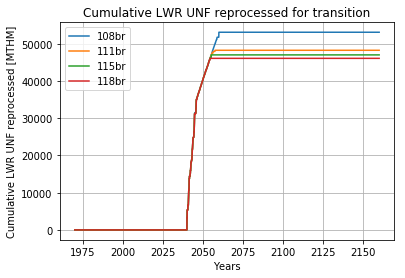

In [79]:
file_list = ['108br.sqlite', '111br.sqlite', '115br.sqlite', '118br.sqlite']
for file in file_list:
    if '108' in file:
        used_comp = br_dict[1.08]
    if '111' in file:
        used_comp = br_dict[1.11]
    if '115' in file:
        used_comp = br_dict[1.15]
    if '118' in file:
        used_comp = br_dict[1.18]
    
    
    print(file)
    name = file.replace('.sqlite', '')
    cursor = an.cursor(file)
    init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy'],
                                                 True, True)
    # lwr UNF reprocessing
    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_timeseries['astrid_fuel_legacy']]
    plt.plot(init_year + timestep/12, rep_for_uox, label=name)
plt.title('Cumulative LWR UNF reprocessed for transition')
plt.xlabel('Years')
plt.ylabel('Cumulative LWR UNF reprocessed [MTHM]')
plt.grid()
plt.legend()
plt.savefig('cum_lwr_br.png')
plt.show()

In [70]:
base_uox = uox_rep_dict['108br']
base_sfr = sfr_rep_dict['108br']
base_tot = total_rep_dict['108br']

print('uox rep')
for key in uox_rep_dict:
    print(key)
    print((uox_rep_dict[key] - base_uox) / base_uox)

print('\n sfr rep')
for key in sfr_rep_dict:
    print(key)
    print((sfr_rep_dict[key] - base_sfr) / base_sfr)

print('\n total')
for key in total_rep_dict:
    print(key)
    print((total_rep_dict[key] - base_tot) / base_tot)



uox rep
108br
0.0
111br
-0.09126213592233115
115br
-0.1145631067961181
118br
-0.13203883495145793

 sfr rep
108br
0.0
111br
-0.055608714095859595
115br
-0.08028520127650297
118br
-0.10517937667263327

 total
108br
0.0
111br
-0.0745134554911668
115br
-0.09846059388189134
118br
-0.11942123865299019


## lifetime extension

In [ ]:
# FR to lwr ratio plot
file_list = ['full_output.sqlite', '5yr.sqlite', '10yr.sqlite', '20yr.sqlite']
for file in file_list:
    if 'yr' not in file:
        name = 'base'
    else:
        name = file.replace('.sqlite', ' ext')
    print(name)
    cursor = an.cursor(file)
    power_cap = an.power_capacity(cursor)
    init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
    ratio = np.array(power_cap['France_astrid']) / max(power_cap['France_government'])
    plt.plot(init_year + timestep/12, ratio, label=name)

plt.legend()
plt.grid()
plt.xlabel('Year')
plt.ylabel('FR to LWR Capacity Ratio')
plt.title('FR to LWR Capacity Ratio')
plt.savefig('ext_ratio.png')
plt.show()


In [80]:
# generate lifetime extension plots
file_list = ['full_output.sqlite', '5yr.sqlite', '10yr.sqlite', '20yr.sqlite']

total_rep_dict = {}
uox_rep_dict = {}
sfr_rep_dict = {}
uox_end_time_dict = {}
tot_astrid_dict = {}

for file in file_list:
    if 'yr' in file:
        name = file.replace('.sqlite', '')
    else:
        name = 'base'
    
    print(name)
    cursor = an.cursor(file)
    
    init_year, init_month, duration, timestep = an.simulation_timesteps(cursor)
    agent_ids = an.agent_ids(cursor, 'Mixer')
    fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                 ['astrid_fuel_legacy', 'astrid_fuel_new'],
                                                 True, False)
    tot_astrid_dict[name] = sum([x+y for x,y in zip(fuel_timeseries['astrid_fuel_legacy'], fuel_timeseries['astrid_fuel_new'])])
    fuel_timeseries['fuel from used uox'] = fuel_timeseries.pop('astrid_fuel_legacy')
    fuel_timeseries['fuel from used mox'] = fuel_timeseries.pop('astrid_fuel_new')
    an.stacked_bar_chart(fuel_timeseries, timestep, 'Years', 'Mass[MTHM]',
                         name+' ext', name,
                         init_year)

    rep_for_uox = [(x * 0.22 / pu_frac_spent_uox[0]) for x in fuel_timeseries['fuel from used uox']]
    # astrid UNF reprocessing
    rep_for_astrid = [(x * 0.22 / br_dict[1.08]) for x in fuel_timeseries['fuel from used mox']]
    last_rep = [i for i, e in enumerate(rep_for_uox) if e != 0][-1]
    uox_end_time_dict[name] = last_rep
    total_monthly_rep_dict[name] = [x+y for x, y in zip(rep_for_uox, rep_for_astrid)]

    # total lwr UNF reprocessed
    cum_fuel_timeseries = an.facility_commodity_flux(cursor, agent_ids,
                                                     ['astrid_fuel_legacy'], True, True)
    lwr_unf_rep = [(x * 0.22 / pu_frac_spent_uox[0]) for x in cum_fuel_timeseries['astrid_fuel_legacy']]
    cum_lwr_unf_rep_dict[name] = lwr_unf_rep
    
    uox_rep_dict[name] = sum(rep_for_uox)
    sfr_rep_dict[name] = sum(rep_for_astrid)
    total_rep_dict[name] = sum(total_monthly_rep_dict[name])

base
5yr
10yr
20yr


In [81]:
base_uox = uox_rep_dict['base']
base_uox_avg = uox_rep_dict['base'] / (uox_end_time_dict['base'] - 600)
base_tot_avg = total_rep_dict['base'] / (duration - 600)
base_tot_astrid = tot_astrid_dict['base']

print('total astrid fuel created')
for key in tot_astrid_dict:
    print(key)
    print((tot_astrid_dict[key] - base_tot_astrid) / base_tot_astrid)
    
print('\n uox rep')
for key in uox_rep_dict:
    print(key)
    print((uox_rep_dict[key] - base_uox) / base_uox)

    
print('\n uox average')
for key in total_rep_dict:
    value = uox_rep_dict[key] / (uox_end_time_dict[key] - 600)
    print((value - base_uox_avg) / base_uox_avg)


print('\n total average')
for key in total_rep_dict:
    value = total_rep_dict[key] / (duration - 600)
    print((value - base_tot_avg) / base_tot_avg)




total astrid fuel created
base
0.0
5yr
-0.03213833061741425
10yr
-0.07097591888465901
20yr
-0.15489770052507107

 uox rep
base
0.0
5yr
0.005825242718442866
10yr
0.03883495145630368
20yr
0.03883495145630368

 uox average
0.0
-0.002504572956244006
-0.033782637383360174
-0.21637489488571737

 total average
0.0
-0.012880798573132653
-0.015272881246606727
-0.05662421292288043
